## ECON570 Final Project

### Research on the happiness level of Chinese residents in the period of economic slowdown——Empirical analysis based on CFPS database

### Group member: Chengbi Li, Liejiang Zhu, Shuyu Ouyang

### 1.Introduction

#### a. Backgroud and main purpose of the project

#### Since the reform and opening, China has experienced a long economic development time. China’s annual growth rate reached 9.78% between 1978 and 2011 averagely, considered as a miracle in the history of economic development. It is commonly believed that the two reasons for that high growth are demographic dividend and globalization. Demographic dividend brings China lots of labors to motivate the growth on the supply side, while globalization stimulates the growth on the demand side. Both effects propelled China’s economy a 32-year prosperous age.

#### However, China’s annual GDP growth rate has desended since 2012. Its annual GDP growth rate is 7.7%, 7.4%, 6.9% and 6.7% respectively from 2013 to 2016. It has become a common fact that China’s economic growth has shifted from a high-speed growth to a medium-speed growth. Correspondingly, the total population in labor market aged from 16 to 59 decreased by 4.87 million, and its proportion in total population dropped by 0.7% in 2015. Diminishing demographic dividend pushes up labor cost, causing more pressure for China’s economy.

#### An issue is often mentioned when researching China’s economy which is happiness growth does not match economic growth. All walks of life in China has been endeavoring to find a method to ease this issue in recent years.

#### This paper utilizes CFPS (China Family Panel Studies) to track and analyze financial situations and well-beings of households, trying to outline the changes in Chinese happiness, which can contribute to policymaking. The significance of this paper situates in two major key points. Firstly, we hope to figure out whether or not people’s happiness would decline during a diminishing growth age, which can be the opposite side of “Happiness Paradox”. Happiness Paradox represents that the improvement of material life does not accord with the increment in happiness. We explore whether or not this paradox exists in China by analyzing data. Secondly, what we try to probe into is if there are other factors having more impacts on people’s happiness except income in an globalization era when economic development reaches such unprecedent level, which plays an extremely important role in policymaking

#### b. Why should we care about this question?

#### 2016-2018 is a very special period for China. From this time point, China's GDP growth began to slow down significantly. And in 2019, China broke out the COVID-19. The impact of the epidemic made it difficult for us to study the relationship between Chinese residents' happiness and income. Therefore, we look at the data from 2016 to 2018 and use CFPS data to analyze whether there is a happiness paradox in China during this time period. This is a relatively innovative research. We found that there is almost no relevant literature to study the casual effect of income on Chinese happiness level in such a special period.

#### c. Literature review

#### There is always a paradox that: Although the average income level of the rich is higher than that of the poor, the happiness level of poor countries is almost as high as that of rich countries, a problem that later researchers called Easterlin's paradox (Easterlin, 1974). He found that relative income, not absolute income, should be used when studying this problem, that is, if the income level of all people in a country increases accordingly, the increase in happiness brought about by the increase in one's own income will be used by others. This is offset by unhappiness from rising incomes (Easterlin, 1995).

#### There are two main explanations for the research on Easterlin's paradox. The first direction is that some non-income factors can also affect people's happiness, such as local education, environment, medical level, etc. Therefore, a country's GNI cannot fully serve as a A key factor in measuring the level of regional happiness, but there are also many criticisms of the interpretation of this direction. Some economists believe that with economic growth, these non-income factors are also increasing accordingly. Generally speaking, the environment in developed countries It is not undermined by local economic development, and better economic conditions can also provide better education for local residents. From this perspective, the endogenous nature of economic growth and these non-income factors makes this statement persuasive. Greatly discounted. The second direction is that individual utility will be positively related to one’s own income level, but negatively related to the average social income level, which is why relative wage level can explain a key factor in the happiness of a country’s residents. The explanation of this paradox is also mainly carried out from this direction.

### 2.Data

#### a. Source of the data

#### Our research data comes from 2016-2018 CFPS(Chinese Family Panel Studies) database.It is a major social science project implemented by the China Social Science Survey Center of Peking University. It aims to reflect the changes of China's society, economy, population, education and health by tracking and collecting data at the three levels of individual, family and community, and provide data for academic research and policy decision-making. The database contains many useful information that can help us to conduct relative research.

#### b. Discussion of how we deal with the data

In [1]:
import pandas as pd               
import numpy as np               
import matplotlib.pyplot as plt  
from matplotlib.ticker import FuncFormatter
import seaborn as sns  
import seaborn as sn
from dateutil import *            
import math                      
import statsmodels.formula.api as smf  
import statsmodels.api as sm     
from collections import Counter   
import scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from numpy.random import randn
from sklearn.linear_model import LinearRegression
import graphviz as gr

#### In order to study the accuracy, we mainly deal with the data in two ways. One is to remove the individuals whose income is 0, because we want to study the relationship between income growth and well-being, and the other is to generate log_ Income is a data item, which is convenient for us to analyze

In [2]:
data = pd.read_csv("/Users/lidengbi/Desktop/570/myfile.csv", 
                   header=0, 
                   index_col=False)

In [3]:
data

,age,gender,living,edu,exedu,married,income,happiness,status,party,health,y2018,y2016,logincome
0,29,1,0,7,-8,1,100000,1,2,5,5,1,0,5.000000
1,21,0,1,4,7,1,30000,1,1,5,3,1,0,4.477121
2,28,0,1,7,-8,1,30000,1,4,5,2,1,0,4.477121
3,31,0,0,7,-8,1,92000,1,1,5,1,1,0,4.963788
4,42,1,1,6,-8,1,5000,1,2,1,2,1,0,3.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,22,1,1,3,3,1,30000,1,3,0,2,0,1,4.477121
8401,21,1,1,2,4,0,25000,1,2,0,2,0,1,4.397940
8402,18,1,1,1,2,0,30000,1,3,0,2,0,1,4.477121
8403,20,1,1,3,4,1,15000,1,3,0,2,0,1,4.176091


#### Check the null value

In [4]:
data_null = data.isna().mean()
data_null.sort_values(ascending = False)

age          0.0
gender       0.0
living       0.0
edu          0.0
exedu        0.0
married      0.0
income       0.0
happiness    0.0
status       0.0
party        0.0
health       0.0
y2018        0.0
y2016        0.0
logincome    0.0
dtype: float64

#### As you can see, null value doesn't exist in our data

#### Check the outliers

(8405, 14)

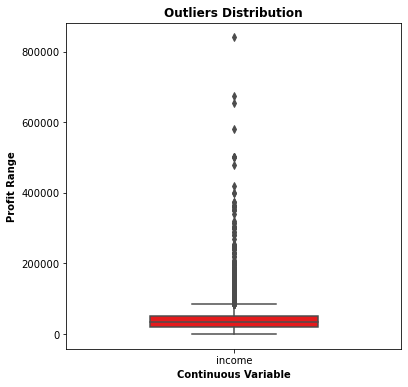

In [5]:
outliers = ['income']
plt.rcParams['figure.figsize'] = [6,6]
sns.boxplot(data=data[outliers], palette="Set1" ,whis=1,saturation=1, width=0.5)
plt.title("Outliers Distribution", fontsize = 12, fontweight = 'bold')
plt.ylabel("Profit Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
data.shape

#### According to the result, most of the income are lower than 200000 yuan, but the distribution of income is consistent with the basic situation in China, so we decided not to remove outliers

#### c. Summary statistics

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405 entries, 0 to 8404
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        8405 non-null   int64  
 1   gender     8405 non-null   int64  
 2   living     8405 non-null   int64  
 3   edu        8405 non-null   int64  
 4   exedu      8405 non-null   int64  
 5   married    8405 non-null   int64  
 6   income     8405 non-null   int64  
 7   happiness  8405 non-null   int64  
 8   status     8405 non-null   int64  
 9   party      8405 non-null   int64  
 10  health     8405 non-null   int64  
 11  y2018      8405 non-null   int64  
 12  y2016      8405 non-null   int64  
 13  logincome  8405 non-null   float64
dtypes: float64(1), int64(13)
memory usage: 919.4 KB


#### We draw the distribution for three main indicators

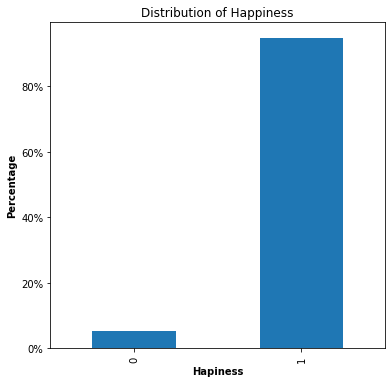

In [7]:
plt.rcParams['figure.figsize'] = [6,6]
ax=(data['happiness'].value_counts()/data['happiness'].count()).sort_index().plot(kind='bar',stacked=True)
plt.title('Distribution of Happiness')
plt.xlabel("Hapiness",fontweight = 'bold')
plt.ylabel("Percentage",fontweight = 'bold')
def to_percent(temp, position):
  return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

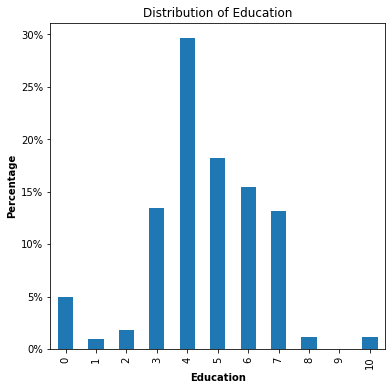

In [8]:
plt.rcParams['figure.figsize'] = [6,6]
ax=(data['edu'].value_counts()/data['edu'].count()).sort_index().plot(kind='bar',stacked=True)
ax.title.set_text('Distribution of Education')
plt.xlabel("Education",fontweight = 'bold')
plt.ylabel("Percentage",fontweight = 'bold')
def to_percent(temp, position):
  return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

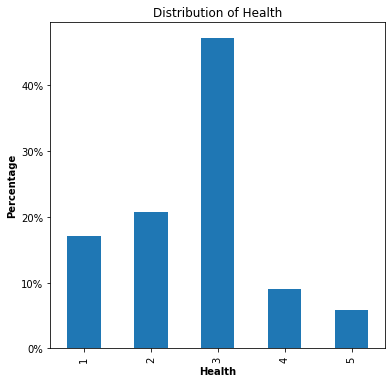

In [9]:
plt.rcParams['figure.figsize'] = [6,6]
ax=(data['health'].value_counts()/data['edu'].count()).sort_index().plot(kind='bar',stacked=True)
ax.title.set_text('Distribution of Health')
plt.xlabel("Health",fontweight = 'bold')
plt.ylabel("Percentage",fontweight = 'bold')
def to_percent(temp, position):
  return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

In [10]:
df_categorical=data[['health', 'edu', 'gender', 'happiness','status',]]

<function matplotlib.pyplot.show(close=None, block=None)>

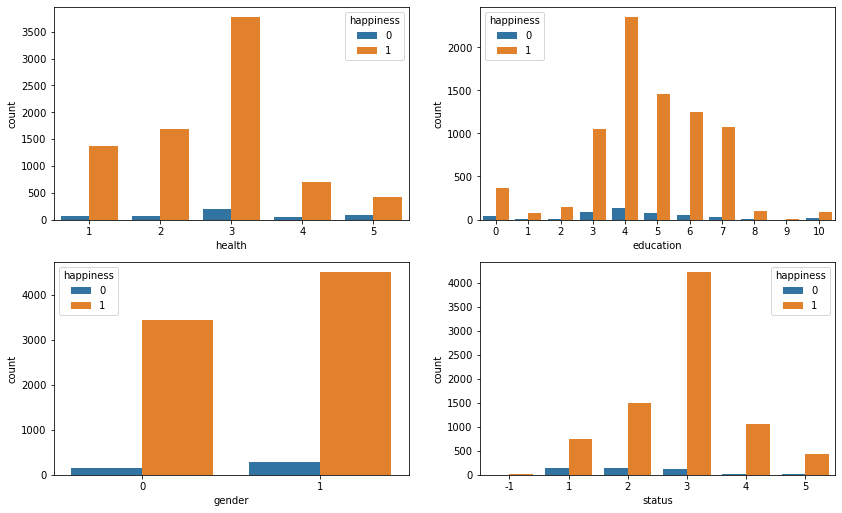

In [11]:
fig, axes = plt.subplots(figsize=(14, 18))
plt.subplot(4, 2, 1)
sns.countplot(x=df_categorical['health'],hue=data['happiness'])
plt.xlabel('health')
plt.subplot(4, 2, 2)
sns.countplot(x=df_categorical['edu'],hue=data['happiness'])
plt.xlabel('education')
plt.subplot(4, 2, 3)
sns.countplot(x=df_categorical['gender'],hue=data['happiness'])
plt.xlabel('gender')
plt.subplot(4, 2, 4)
sns.countplot(x=df_categorical['status'],hue=data['happiness'])
plt.xlabel('status')
plt.show

### 3.Model

#### a. OLS Regression Model

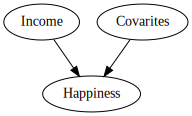

In [12]:
g = gr.Digraph()
g.edge("Income", "Happiness")
g.edge("Covarites", "Happiness")
g

#### No covariates regression result

In [13]:
result = smf.ols(formula = "happiness ~ logincome", data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              happiness   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.049
Date:                Fri, 06 May 2022   Prob (F-statistic):             0.0442
Time:                        00:12:26   Log-Likelihood:                 653.53
No. Observations:                8405   AIC:                            -1303.
Df Residuals:                    8403   BIC:                            -1289.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8999      0.024     38.181      0.0

#### the regression result with no covarites is in line with our basic knowledge

#### With covariates regression result

In [14]:
result = smf.ols(formula = "happiness ~ y2018 + y2016 + edu + age + gender + living + married + status + party + health + logincome", data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              happiness   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     31.50
Date:                Fri, 06 May 2022   Prob (F-statistic):           3.67e-66
Time:                        00:12:26   Log-Likelihood:                 821.51
No. Observations:                8405   AIC:                            -1619.
Df Residuals:                    8393   BIC:                            -1535.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9303      0.031     30.048      0.0

#### We can see the regression result with covarites is a total mess, the coefficients of many varibles are no in line with our common knowledge, and the t-value of logincome is also not significant, so we will use some other models.

#### b.Logisitcs model

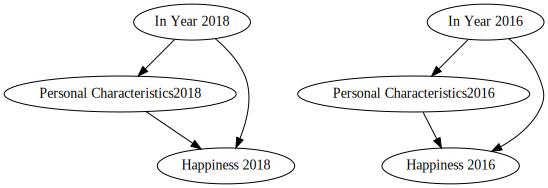

In [15]:
g = gr.Digraph()

g.edge("In Year 2018", "Personal Characteristics2018")
g.edge("Personal Characteristics2018", "Happiness 2018")
g.edge("In Year 2018", "Happiness 2018")

g.edge("In Year 2016", "Personal Characteristics2016")
g.edge("Personal Characteristics2016", "Happiness 2016")
g.edge("In Year 2016", "Happiness 2016")
g

#### We decide to add the variables step by step

In [16]:
X = data[['y2018', 'y2016']]
y = data['happiness']

In [17]:
logit_model1=sm.Logit(y,X)

In [18]:
result1=logit_model1.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.230834
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.115   
Dependent Variable: happiness        AIC:              3884.3167
Date:               2022-05-06 00:12 BIC:              3898.3899
No. Observations:   8405             Log-Likelihood:   -1940.2  
Df Model:           1                LL-Null:          -1740.6  
Df Residuals:       8403             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
------------------------------------------------------------------
            Coef.    Std.Err.      z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
y2018       2.8751     0.0505   56.9161   0.0000   2.7761   2.9741
y2016       3.0744     0.3084    9.9688   0.0000   2.4699   3.6788



In [19]:
X = data[['y2018', 'y2016', 'age', 'gender', 'living', 'status', 'married']]
y = data['happiness']

In [20]:
logit_model2=sm.Logit(y,X)

In [21]:
result2=logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.195688
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.055     
Dependent Variable: happiness        AIC:              3303.5185 
Date:               2022-05-06 00:12 BIC:              3352.7746 
No. Observations:   8405             Log-Likelihood:   -1644.8   
Df Model:           6                LL-Null:          -1740.6   
Df Residuals:       8398             LLR p-value:      1.0717e-38
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
            Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-------------------------------------------------------------------
y2018       0.7647     0.1349    5.6696   0.0000    0.5003   1.0290
y2016       1.6386     0.3356    4.8821   0.0000    0.9807

In [22]:
X = data[['y2018', 'y2016', 'age', 'gender', 'living', 'status', 'married', 'edu','health']]
y = data['happiness']

In [23]:
logit_model3=sm.Logit(y,X)

In [24]:
result3=logit_model3.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.190716
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.079     
Dependent Variable: happiness        AIC:              3223.9375 
Date:               2022-05-06 00:12 BIC:              3287.2667 
No. Observations:   8405             Log-Likelihood:   -1603.0   
Df Model:           8                LL-Null:          -1740.6   
Df Residuals:       8396             LLR p-value:      7.1959e-55
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
y2018      0.2336     0.1765    1.3233   0.1857   -0.1124    0.5795
y2016      1.5503     0.3442    4.5043   0.0000    0.8757 

In [25]:
X = data[['y2018', 'y2016', 'age', 'gender', 'living', 'status', 'married', 'edu', 'health', 'logincome']]
y = data['happiness']

In [26]:
logit_model4=sm.Logit(y,X)

In [27]:
result4=logit_model4.fit()
print(result4.summary2())

Optimization terminated successfully.
         Current function value: 0.189835
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.083     
Dependent Variable: happiness        AIC:              3211.1289 
Date:               2022-05-06 00:12 BIC:              3281.4947 
No. Observations:   8405             Log-Likelihood:   -1595.6   
Df Model:           9                LL-Null:          -1740.6   
Df Residuals:       8395             LLR p-value:      3.1917e-57
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
y2018         -0.2537    0.2354  -1.0779  0.2811  -0.7150   0.2076
y2016          0.8894    0.3924   2.2667  0.0234   0.1203   1.

In [28]:
from statsmodels.iolib.summary2 import summary_col
dfoutput = summary_col([result1,result2,result3,result4],stars=True)
print(dfoutput)


          happiness I happiness II happiness III happiness IIII
---------------------------------------------------------------
age                   -0.0050      0.0066        0.0005        
                      (0.0039)     (0.0045)      (0.0047)      
edu                                0.2268***     0.1634***     
                                   (0.0271)      (0.0317)      
gender                -0.1034      -0.1567       -0.2658**     
                      (0.0999)     (0.1021)      (0.1070)      
health                             -0.2437***    -0.2773***    
                                   (0.0452)      (0.0462)      
living                -0.1251      0.0551        -0.0339       
                      (0.1010)     (0.1076)      (0.1107)      
logincome                                        0.2941***     
                                                 (0.0772)      
married               0.8384***    0.8422***     0.7953***     
                      (0.1066)     (0.1

#### So as you can see, the logistics model performacne is significantly better than the OLS model, so in the following we will use the logit result to draw our conclusion

#### Residual plot

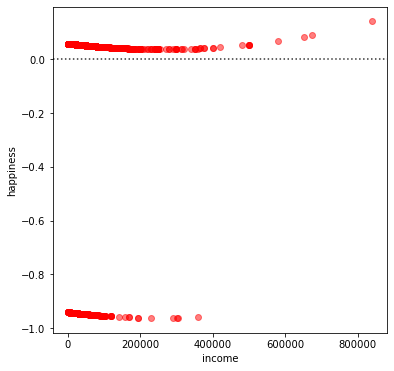

In [29]:
g1 = sns.residplot(x='income', y='happiness', order=2,
   data=data, scatter_kws={'color': 'r',
   'alpha': 0.5});
plt.show();

#### c.Instrument variables

#### From the CFPS database, we find the varible called "exedu" that may have the ability to serve as the IV of education, and we want to see whether it can improve the OLS result.

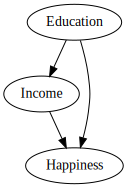

In [30]:
g = gr.Digraph()
g.edge("Education", "Income")
g.edge("Education", "Happiness")
g.edge("Income", "Happiness")
g

In [31]:
result = smf.ols(formula = "edu ~ exedu", data = data).fit()
print(result.summary())

data['edu_fitted'] = result.predict()  #D-hat

                            OLS Regression Results                            
Dep. Variable:                    edu   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.590
Date:                Fri, 06 May 2022   Prob (F-statistic):              0.108
Time:                        00:12:27   Log-Likelihood:                -16972.
No. Observations:                8405   AIC:                         3.395e+04
Df Residuals:                    8403   BIC:                         3.396e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5750      0.028    166.240      0.0

In [32]:
result = smf.ols(formula = "happiness ~ edu_fitted + age + gender + living + married + status + party + health + y2018 + y2016 + logincome", data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              happiness   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     30.39
Date:                Fri, 06 May 2022   Prob (F-statistic):           1.12e-63
Time:                        00:12:27   Log-Likelihood:                 815.62
No. Observations:                8405   AIC:                            -1607.
Df Residuals:                    8393   BIC:                            -1523.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9023      0.482      3.944      0.0

#### Base on the results of first-stage regression, we found that the F-value of the regression is 2.78 which is below 10, indicating the selected instrument variable didn't pass the test. Thus, the results of IV model is not reliable to explain the relationship between happiness and the selected influening factors.

#### d. Improved OLS：By adding interaction term

In [33]:
result = smf.ols(formula = "happiness ~ edu + age + gender + living + married + status + party + health + y2018 + y2016 + edu*logincome + logincome", data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              happiness   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     29.24
Date:                Fri, 06 May 2022   Prob (F-statistic):           2.66e-66
Time:                        00:12:27   Log-Likelihood:                 823.64
No. Observations:                8405   AIC:                            -1621.
Df Residuals:                    8392   BIC:                            -1530.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.0255      0.056     18.475

#### After adding the interaction between education and income, we can find that the regression result of OLS is significantly better, and there is a negative relationship between income and happiness

In [34]:
result = smf.ols(formula = "happiness ~ edu + age + gender + living + married + status + party + health + y2018 + y2016 + health*logincome + logincome", data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              happiness   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     28.91
Date:                Fri, 06 May 2022   Prob (F-statistic):           1.67e-65
Time:                        00:12:27   Log-Likelihood:                 821.75
No. Observations:                8405   AIC:                            -1618.
Df Residuals:                    8392   BIC:                            -1526.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8918      0.063  

#### After adding the interaction between health and income, we can find that it is not very helpful for us to improve the OLS model


### 4.Findings

#### a. Main findings

#### The improved OLS model and logit model show different results. The results of the model with the interaction of education and income show that there is a negative relationship between income and happiness. China fell into the happiness paradox during the period of economic slowdown, while the results of Logit model are on the contrary, which is the most important finding of our study.

#### But according to the coefficient of covariates in the model, we think the result of logit model is more convinced(the OLS with interaction term shows that health has the negative relationship with happiness, which is beyond our expectations.)

#### b. Comparison with different models

#### In this study, we tried four methods: 1 OLS model with and without covariates 2.Logistics model 3.Instrument varible 4.Interaction term. The results of the first and third models are not statistically significant, so we do not analyze them, while the second and fourth models show diametrically opposite conclusions and are statistically significant

### 5.Conclusion

#### a. Learnings of the project

#### Based on the result of logit model, China doesn't fall into the happniess paradox in such a special period.However,Since the reform and opening up, China has maintained a GDP growth rate of 10%, which has attracted the attention of the world. However, since 2012, China's GDP growth has begun to slow down. Scholars often attribute this situation to China's gradual entry into the aging era and no longer enjoying the demographic dividend. China has entered the dilemma faced by Japan's economic development in the 1990s.

#### In this context, the Chinese government is thinking about how to transform the growth of GDP into the happy life of the people, rather than blindly pursuing economic development and ignoring people's life. The world is currently experiencing the fourth industrial revolution. The progress of AI technology has further connected people all over the world, and people's lives are changing with each passing day. In this case, a point of view put forward in this paper, Firstly, income can indeed improve people's well-being, which is the same as the traditional view. The biggest innovation of this paper is that it is found that education level and health status can improve the improvement of income to well-being. This conclusion is particularly important in the domestic economic background of economic slowdown. People's well-being is difficult to be improved through the rapid growth of economy. We can strengthen infrastructure investment, Increase investment in medical education, so that people's income can have a greater impact on happiness.

#### b. Possible improvement in the future

#### Of course, there are still some endogenous problems that have not been solved in this paper. Measuring people's happiness through objective indicators is a very challenging work. We are cautious and open to the research results, hoping to promote more in-depth research

### Reference

#### [1]Easterlin R A . Nations and Households in Economic Growth || Does Economic Growth Improve the Human Lot? Some Empirical Evidence[J]. Elsevier Monographs, 1974:89-125.

#### [2]Easterlin R A . Will raising the incomes of all increase the happiness of all?[J]. Journal of Economic Behavior & Organization, 1995, 27(1):35-47.